# Transformée de Fourier numérique

## Principe

C'est la "digital Fourier Transform" (DFT). La fast Fourier Tranform est un algorithm permettant de calculer la DFT. 

On définit la transformée de Fourrier numérique de la façon suivante : 

\begin{equation}
    \tilde{s}_k = \sum_{j=0}^{N} s_j \mathrm e^{-{\rm i}2\pi \frac{k}{N}j}
    \label{eq:DFT}
\end{equation}

Cette formule établit une bijection entre $\mathbb{C}^N$ vers $\mathbb{C}^N$. 

Lorsque l'on échantillone un signal, on définit : 
* $f_s$ le taux d'échantillonage
* $\delta t= 1/f_s$
* $N$ le nombre d'échantillons
* $t_j = t_0 + j\delta t$
 
Dans le cas où $s_j$ représente le signal s(t_j), on a le lien suivant avec la TF usuelle :
\begin{equation}
    \tilde{s}_k = \sum s_j \mathrm e^{{\rm i}2\pi \frac{k}{N\delta t}(j\delta t)} = \frac{1}{\delta t} \sum f(t_j) \mathrm e^{{\rm i}2\pi t_j \frac{k}{T}} \delta t = \frac{1}{\delta t} \tilde{s}\left(\frac{k}{T}\right)
\end{equation}
où la transformée de Fourier usuelle est définie par : 
\begin{equation}
\tilde{s}(f) = \int_{-\infty}^{+\infty} s(t)\, \mathrm e^{-2{\rm i}\pi t}\,\mathrm dt
\end{equation}

Dans cette formule, le coefficient $\tilde{s}_k$ est de période $N$. Il serait naturel de le restreindre entre $-N/2$ et $N/2$ pour les fréquences $-f_e/2$ et $f_e/2$. Cependant, numériquement, on utilise toujours des tableaux d'indice positif ! Les fréquences associées à $s_k$ pour $k>N/2$ correspondent à des fréquences négatives données par $(k-N)/T$. 

## FFT avec numpy

On utilise le package `numpy.fft` lequel contient plusieurs fonctions utiles : 

* `fft` et `ifft`, la DFT et son inverse
* `fftfreq` qui permet de calculer la fréquence associée au point $\tilde{s}_k$
* `fftshift` change l'ordre du tableau pour que la fréquence nulle soit au centre. A utiliser ne général sur la `fft` et sur `fftfreq` en même temps.
* `rfft` et `irfft` : lorsque le tableau est réel, on peut ne garder que les fréquences positives avec des coeficients complexes (bijection de $\mathbb{R}^N$ vers $\mathbb{C}^{N/2}$. 

## Densité spectrale de puissance

In [5]:
import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.01
N = 1000

T = N*delta_t

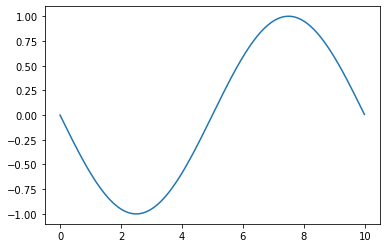

In [8]:
liste_t = np.arange(N)*delta_t

freq_1 = 2/T
y_1 = np.sin(2*np.pi*freq_1*liste_t)

freq_2 = (N-1)/T
y_2 = np.sin(2*np.pi*freq_2*liste_t)


plt.plot(liste_t, y_2)